In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
import numpy as np

In [124]:
df = pd.read_csv('Mall_Customers.csv')
gender_map = {'Male': 0, 'Female': 1}
# df['Gender Code'] = df['Genre'].map(gender_map)
age_bins = [0, 15, 30, 45,60,80, 100]
age_labels = [1, 2, 3,4,5,6]
df['Age Class'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
income_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200]
income_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11]
df['Income Class'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, labels=income_labels)
X = df.iloc[:, [5,6]].values

In [ ]:
X

In [149]:
from scipy.stats import mode

In [150]:
def kmode(k):
    epochs=100
    
    rng = np.random.default_rng()
    centroids = rng.choice(X, size=k, replace=False)
    n_samples, n_features = X.shape
    distances = np.zeros((n_samples, k))

    for e in range(epochs):
        for i in range(n_samples):
            data=X[i]
            for j in range(k):
                cen=centroids[j]
                dis=0
                for d in range(n_features):
                    if data[d]!=cen[d]:
                        dis+=1
                distances[i, j] = dis

        labels = np.argmin(distances, axis=1)

        
    # print(labels)
        # for j in range(k):
        # #     #calc mode of each feature for every centroid here
        #     mask = labels == j
        #     if np.sum(mask) > 0:
        #         centroids[j] = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=X[mask])
        for j in range(k):
            cluster_j = X[labels == j]
            # return cluster_j
            # centroids[j] = cluster_j.mode().
            centroids[j]  = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=cluster_j)
    # labels_ = labels
    # cluster_centers_ = centroids
    return labels, centroids


In [164]:
clusters, centroids=kmode(5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4204\2471670578.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df.iloc[j, 3], df.iloc[j, 2], c=colors[i], cmap='rainbow')


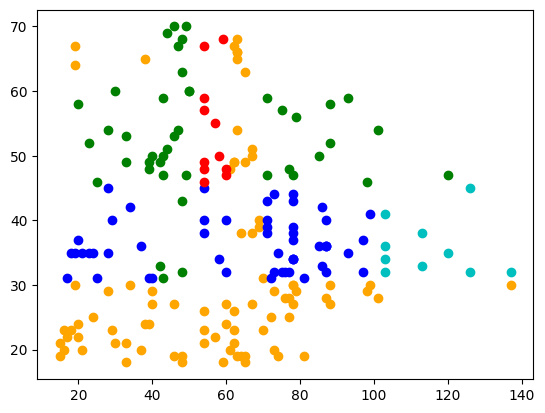

In [165]:
colors=['orange','g','b','c','r','m','grey','y','k']
for i in range(5):
    for j in range(200):
        if clusters[j]==i:
            plt.scatter(df.iloc[j, 3], df.iloc[j, 2], c=colors[i], cmap='rainbow')
# plt.scatter(centroids[:,0], centroids[:, 1], s=150, c='k')
plt.show()

In [ ]:
# def distance(point1,point2):
#     return np.sqrt(np.sum((point1-point2)**2))

In [ ]:
# def calculate_wcss(centroids, clusters, data):
#     wcss = 0
#     for i in range(centroids.shape[0]):
#         cluster_points = data[clusters == i]
#         centroid = centroids[i]
#         distances = distance(cluster_points,centroid)**2
#         wcss += np.sum(distances)
#     return wcss

In [ ]:
# wcss=[]
# for k in range(1,13): 
#     clusters, centroids=kmode(k)
#     print(k,end=": ")
#     for i in range(k):
#             points=[X[j] for j in range(200) if clusters[j]==i]
#             print(len(points),end=" ")
#     print()
#     wcss.append(calculate_wcss(centroids,clusters,X))

In [ ]:
# n_samples, n_features = X.shape
# print(n_samples,n_features)